In [1]:
import pandas as pd

In [2]:
# iris = datasets.load_iris()

# iris.target_names

# iris.target

In [3]:
FILE_PATH = r"C:\Users\PAVAN KANAMARLAPUDI\Desktop\Sai\sample_dataset.txt"
data = pd.read_csv(FILE_PATH,header=None)

In [4]:
data.head()

,0,1,2,3,4
0,5.4,3.7,1.5,0.2,Class-A
1,4.8,3.4,1.6,0.2,Class-A
2,4.8,3.0,1.4,0.1,Class-A
3,4.3,3.0,1.1,0.1,Class-A
4,5.8,4.0,1.2,0.2,Class-A


### SVM

* Download the sample data set from the Blackboard Week9 folder. Implement the __support vector machine (SVM)__ method to this data set in Python. Also, show the `confusion matrix` and `normalized confusion matrix` on the console.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

In [7]:
sklearn.__version__ # it should be 1.0

'1.0'

In [8]:
class_names = np.array(data[4].unique())

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [10]:
data['target'] = label_encoder.fit_transform(data.iloc[:,4])

In [11]:
data.drop(4,axis=1,inplace=True)

In [12]:
data.head()

,0,1,2,3,target
0,5.4,3.7,1.5,0.2,0
1,4.8,3.4,1.6,0.2,0
2,4.8,3.0,1.4,0.1,0
3,4.3,3.0,1.1,0.1,0
4,5.8,4.0,1.2,0.2,0


In [13]:
# data[data.target==2]

In [14]:
X = data.iloc[:,:4]

In [15]:
y = data.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [17]:
X_train.shape

(90, 4)

In [18]:
X_test.shape

(30, 4)

In [19]:
data.shape

(120, 5)

In [21]:
classifier = svm.SVC(kernel="linear",C=0.01)

In [22]:
svm_model = classifier.fit(X_train,y_train)

In [23]:
np.set_printoptions(precision=2)

COnfustion Matrix, without normalization
[[10  0  0]
 [ 0  8  4]
 [ 0  0  8]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.67 0.33]
 [0.   0.   1.  ]]


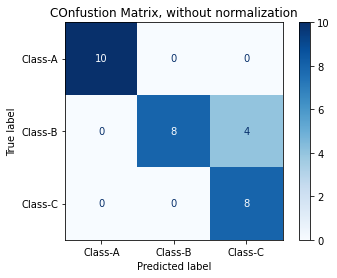

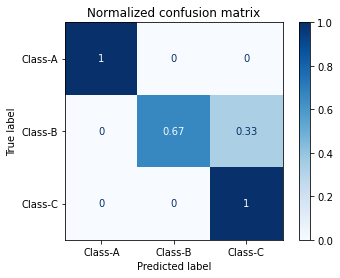

In [24]:
title_options = [("COnfustion Matrix, without normalization",None),
                ("Normalized confusion matrix","true")]

for title,normalize in title_options:
    disp = ConfusionMatrixDisplay.from_estimator(
            svm_model,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

### ANN

* Download the sample data set from the Blackboard Week9 folder. Implement artificial neural
networks (ANN) method to this data set. Then, find the prediction results of the following three test samples.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X)

StandardScaler()

In [28]:
X = scaler.transform(X)

In [33]:
#create and train neural network model

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
mlp.fit(X,y.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [35]:
#Predictions

predictions = mlp.predict([[3,4,10,7]])
print(predictions)

[2]


In [36]:
predictions = mlp.predict([[2,0,5,1]])
print(predictions)

[2]


In [37]:
predictions = mlp.predict([[1,1,2,8]])
print(predictions)

[2]
